In [2]:
import sys
sys.path.insert(0, '..')
from motif_learning import MotifLearner
import mat73
import numpy as np
import matplotlib.pyplot as plt

## Creating musical data (musical notes of 'Deck the halls')

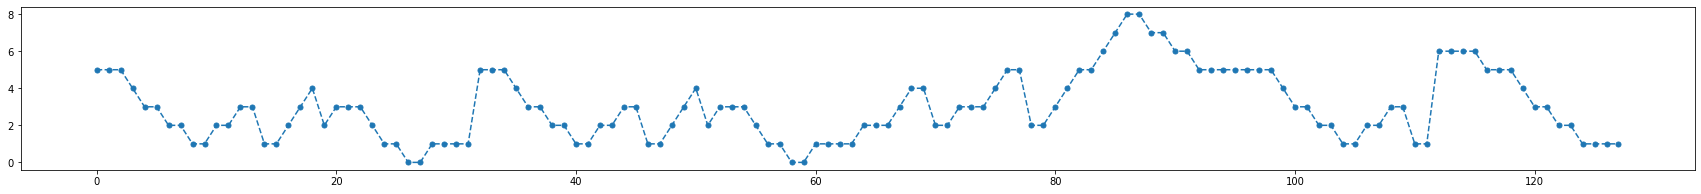

In [4]:
notes=[]
ss= '5  43 2 1 2 3 1 23423  21 0 1   5  43 2 1 2 3 1 23423  21 0 1   2  34 2 3  45 2 345 678 7 6 5   5  43 2 1 2 3 1 66665  43 2 1   '
for elem in ss:
    if elem.isnumeric():
        notes.append(int(elem))
    else:
        notes.append(notes[-1])

notes=np.array(notes)
m = notes.size
        
plt.figure(figsize=(30,3))
plt.plot(notes,linestyle='--', marker='.',markersize=10)

### Pre-processing

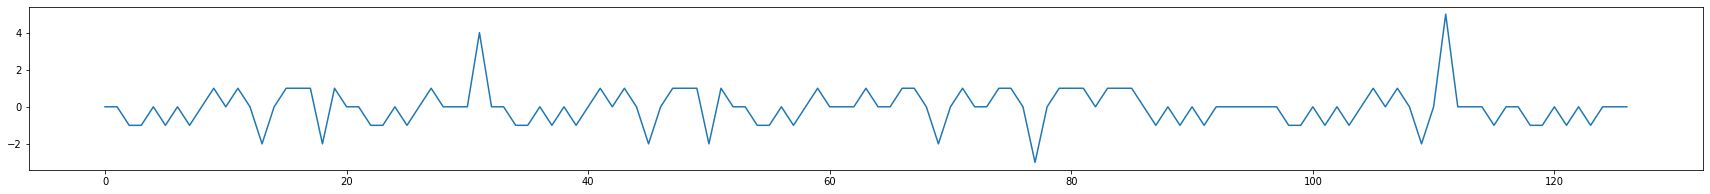

In [5]:
intervals = notes[1:] - notes[:-1]
plt.figure(figsize=(30,3))
plt.plot(intervals)
dataset=intervals

## Motif learning

In [14]:
motifl = MotifLearner(sim_thresh=1, freq_thresh=2, l_motif_range=[4,20])
motifl.fit(dataset)
motifl.get_motifs()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[[-1, 0, -1, 0],
 [0, 1, 1, 1],
 [0, 1, 0, 0],
 [0, -1, 0, 0],
 [1, 0, -2, 0, 1],
 [0, -1, 0, -1, 0],
 [-1, 0, -1, 0, 1, 0],
 [-1, 0, -1, 0, -1, 0],
 [0, 0, -1, -1, 0, -1, 0],
 [0, 0, -1, -1, 0, -1, 0, -1, 0],
 [0, 0, -1, -1, 0, -1, 0, -1, 0, 1, 0, 1, 0, -2, 0]]

## Visualising motifs with interactive plot

In [15]:
motifl.matrix_plot()

interactive(children=(IntSlider(value=12, description='l_motif', max=20, min=4), Output()), _dom_classes=('wid…

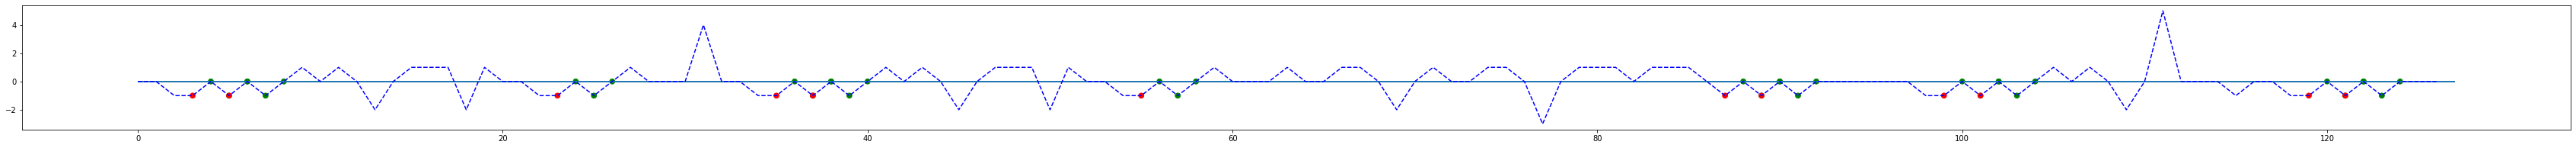

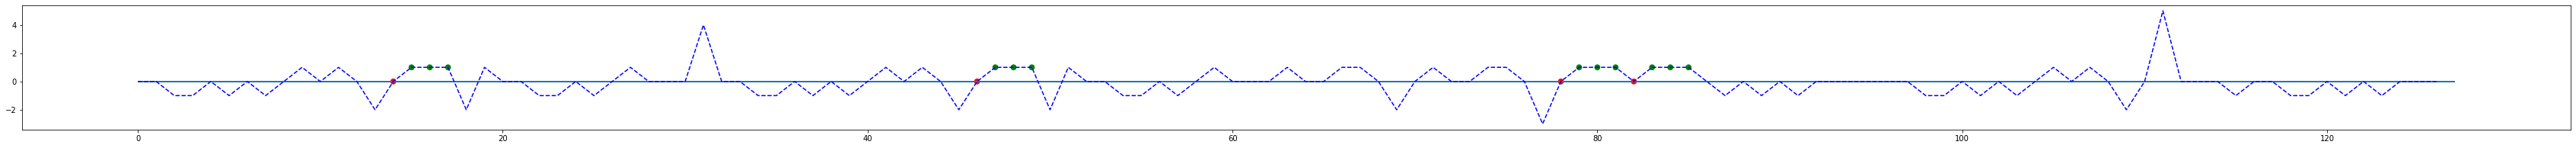

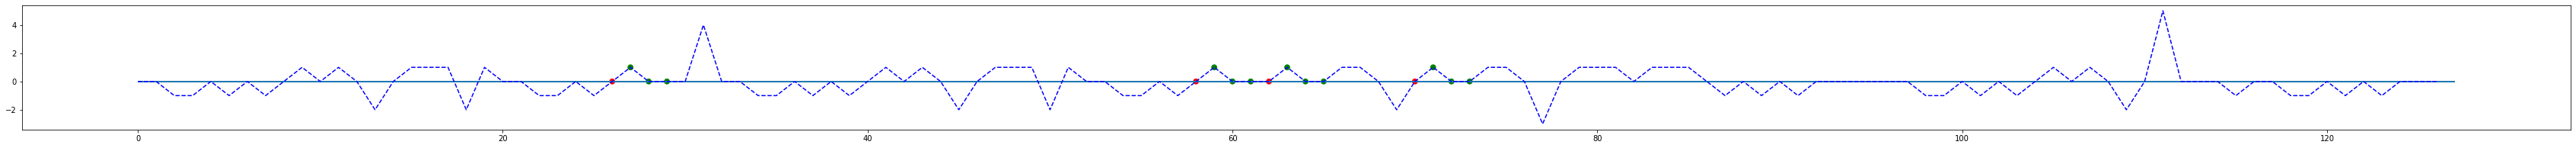

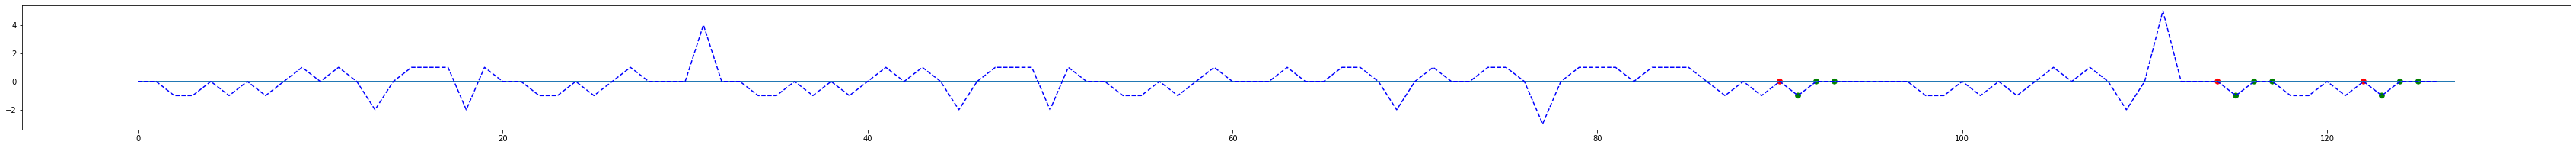

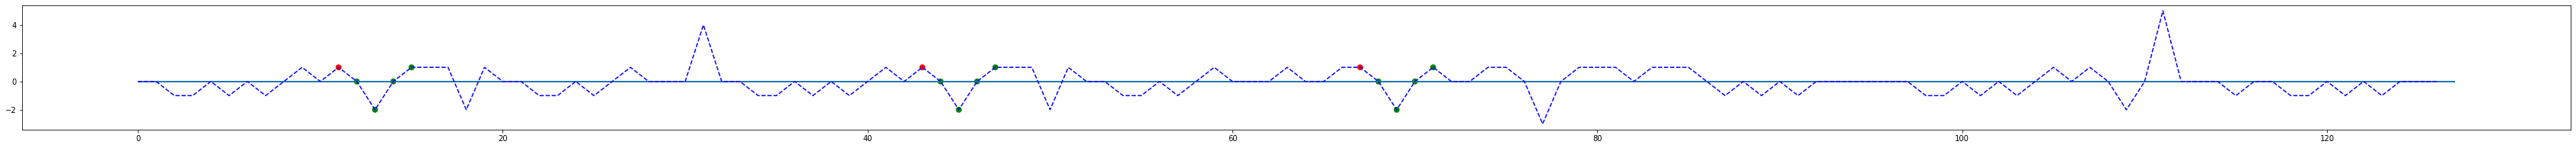

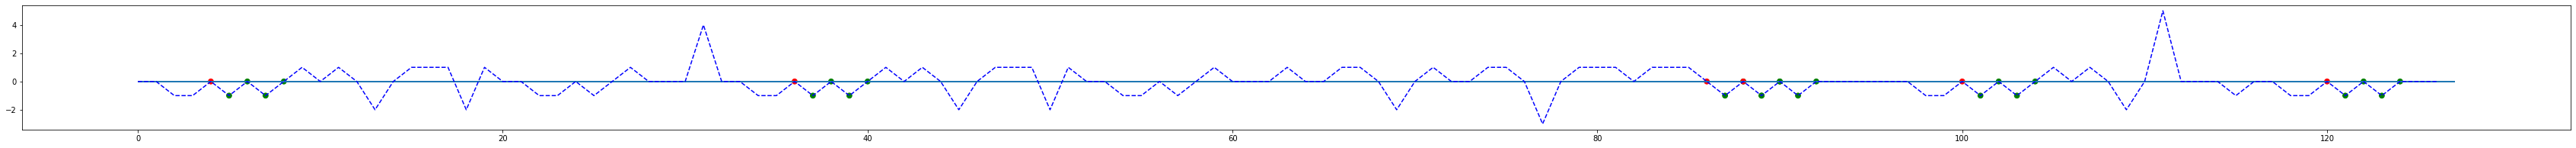

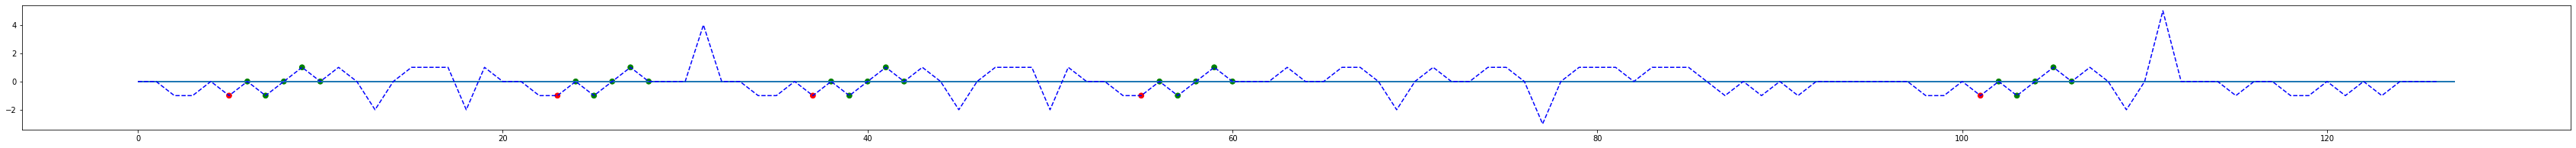

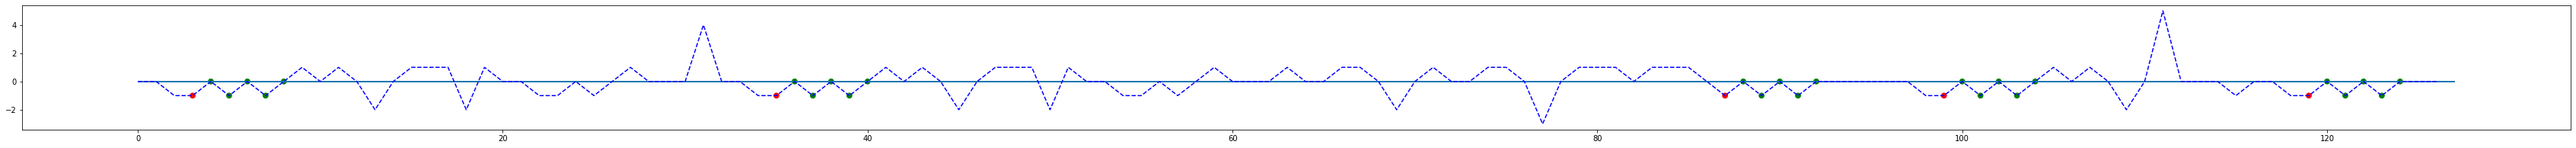

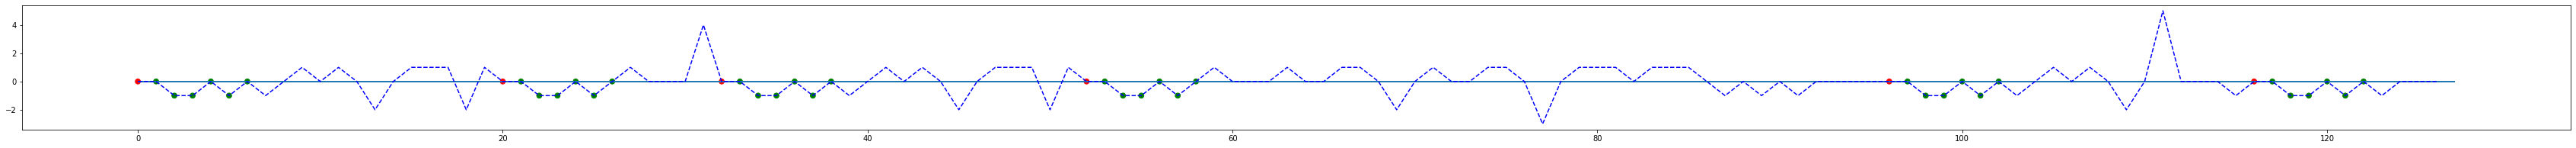

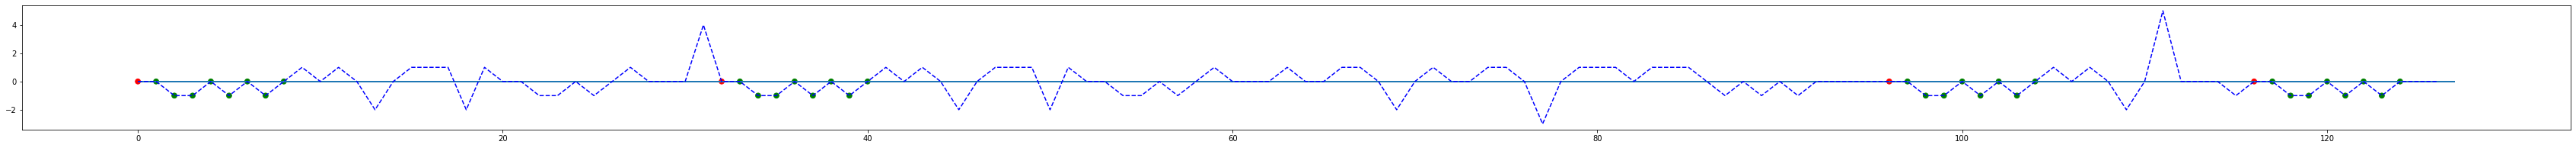

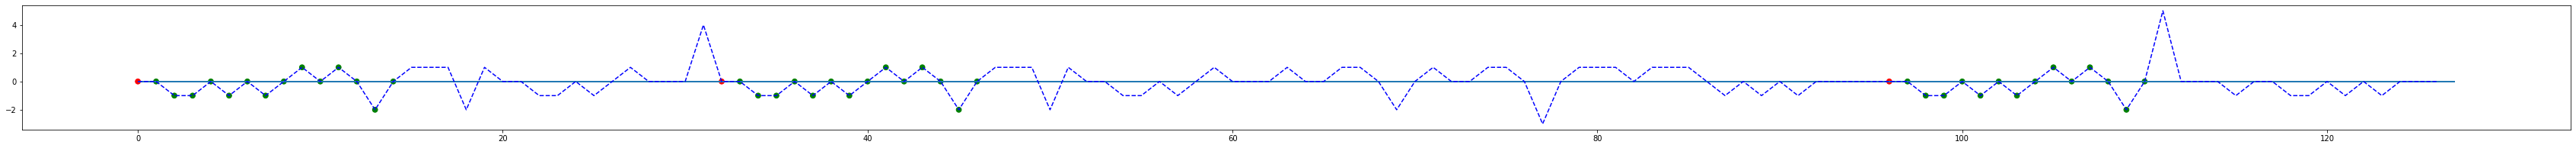

In [16]:
motifl.plot_motif_appearances(pruned=False)

## Analysis of how the motifs compose, and pruning

In [17]:
motif_comp_mtx, pruned_motif_list = motifl.motif_composition_analysis()

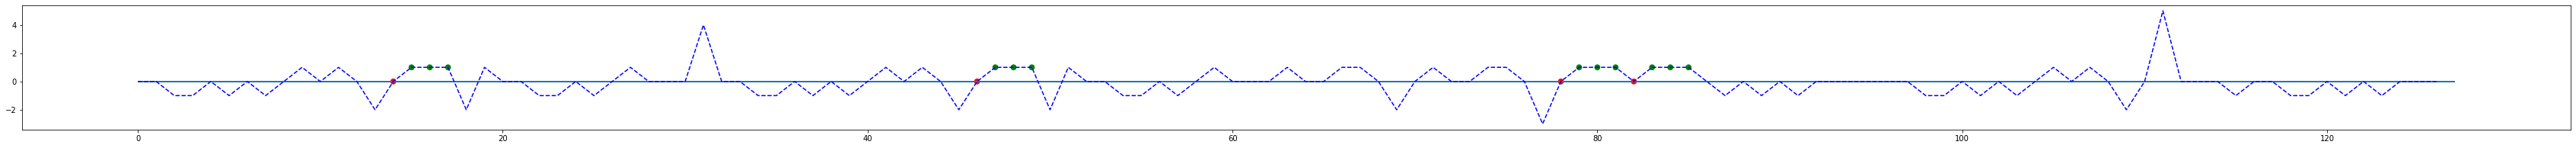

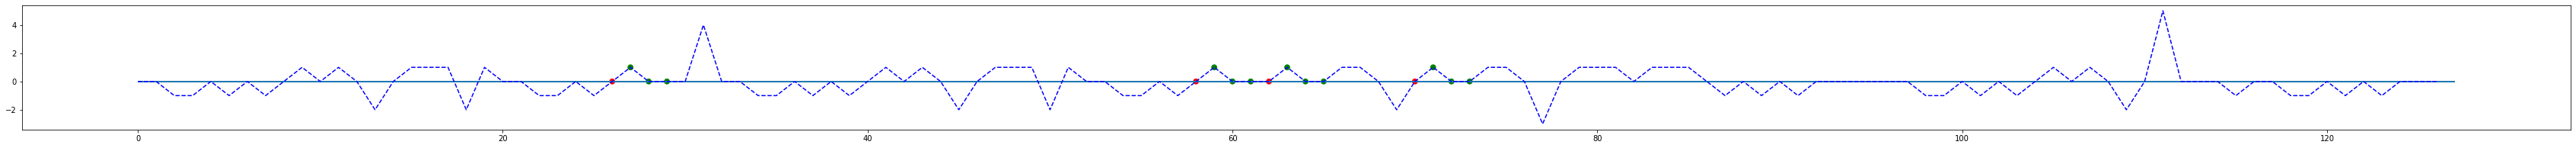

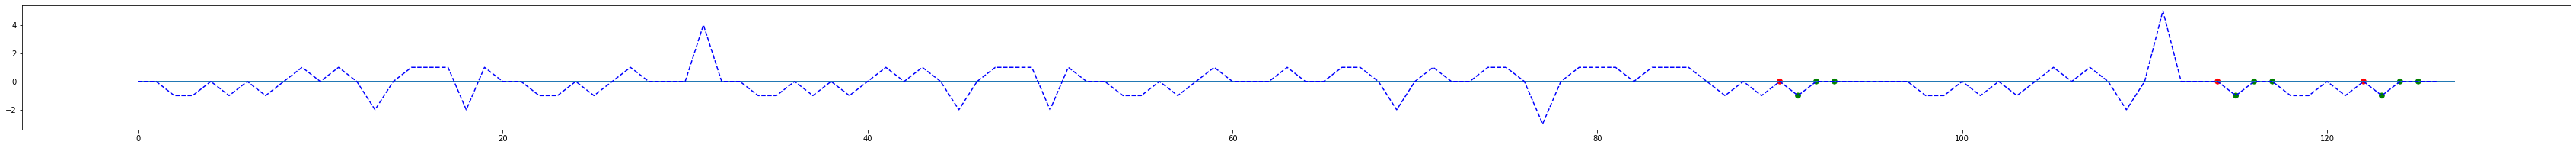

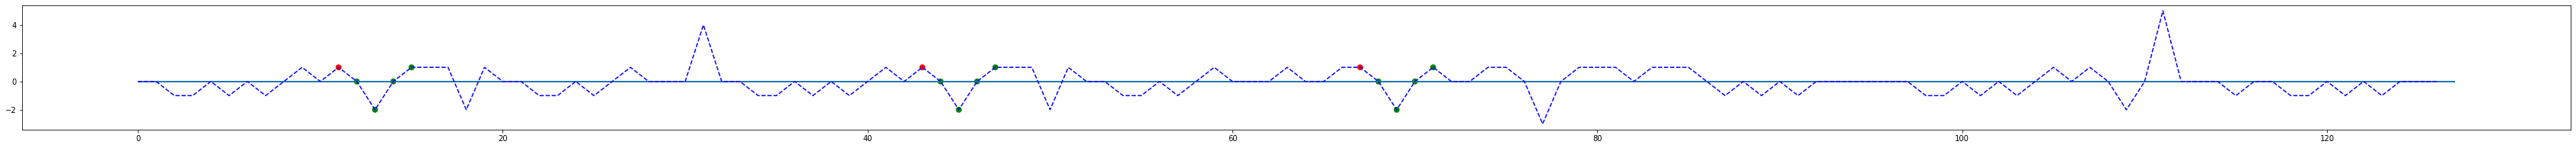

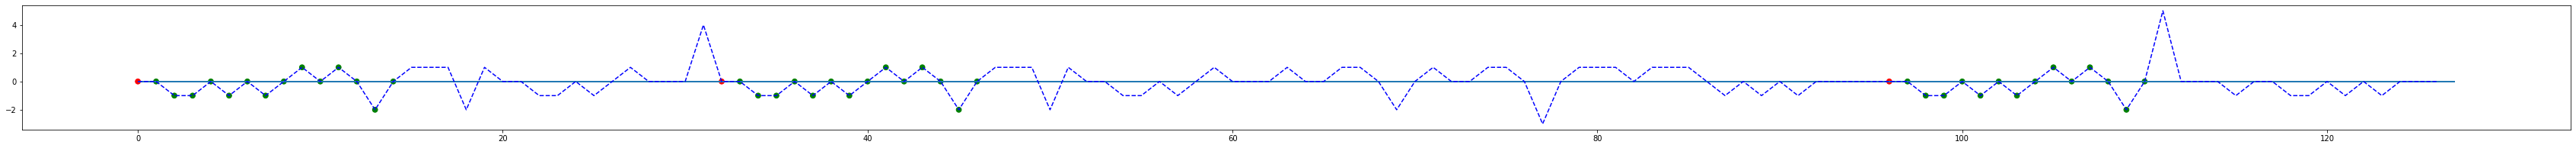

In [18]:
motifl.plot_motif_appearances(pruned=True)

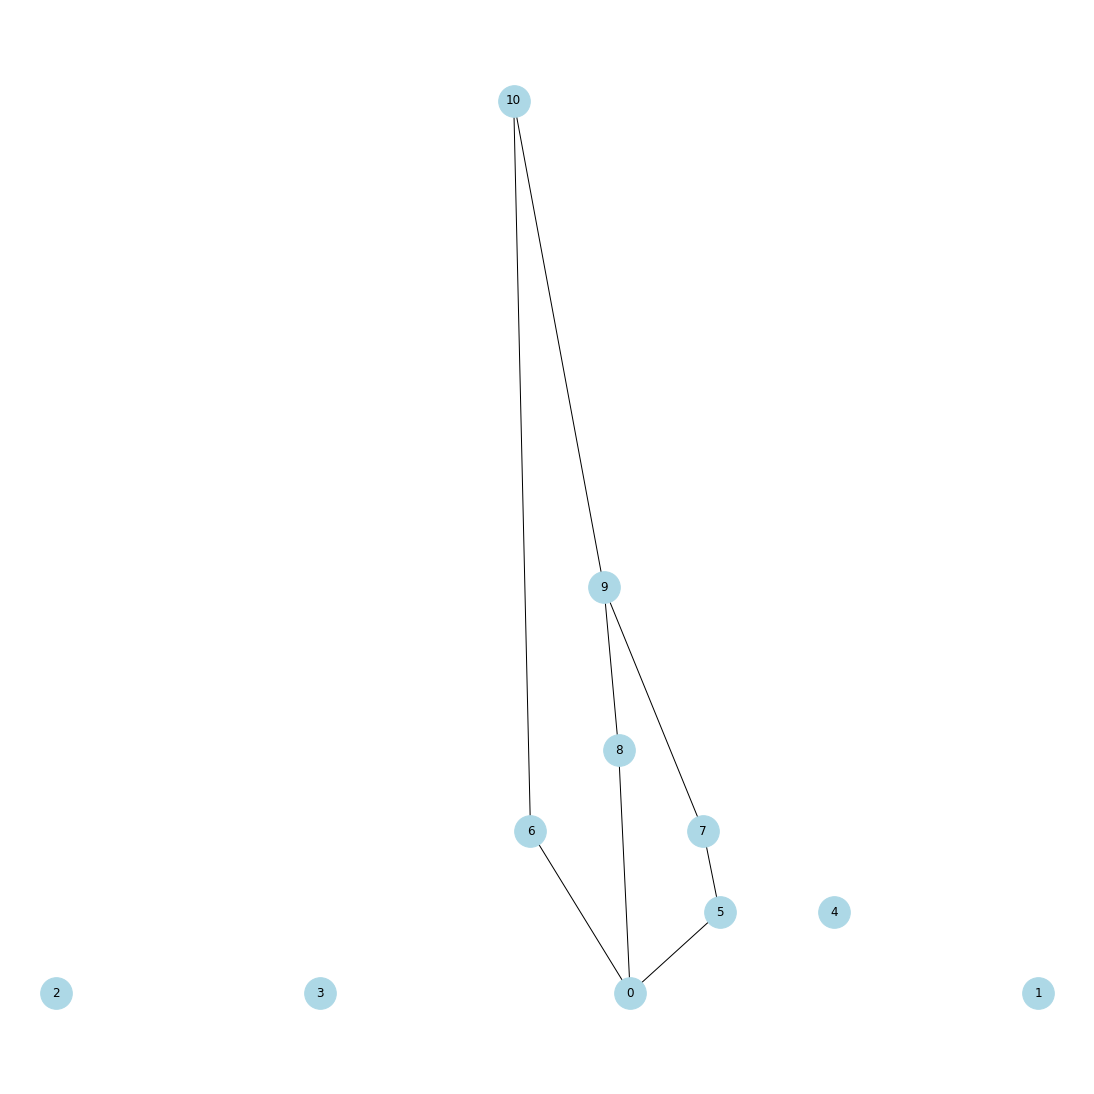

In [20]:
motifl.plot_motif_composition_graph()